# Atividade da Semana 11

Esta é atividade semanal sugerida. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

> A predição da compra de um veículo pelos clientes é uma ferramenta extremamente valiosa para o time de marketing de uma concessionária. Ao relacionar o desfecho (*output*) "compra" com a informação de salário dos clientes, através de regressão logística, é possível obter *insights* significativos que podem impulsionar as estratégias de marketing e aumentar as chances de sucesso nas vendas.

> Uma das principais vantagens da predição é a capacidade de identificar padrões e tendências no comportamento dos clientes. Ao analisar a relação entre o salário e a decisão de compra, o time de marketing pode compreender melhor quais faixas salariais têm maior probabilidade de adquirir um veículo. Essas informações são extremamente valiosas para direcionar os esforços de marketing de forma mais eficiente, direcionando recursos para os clientes com maior potencial de conversão.

> Além disso, a predição da compra também auxilia na personalização das campanhas e na segmentação de mercado. Com base nos resultados da regressão logística, é possível identificar características e preferências específicas dos clientes que estão mais propensos a comprar um automóvel. Isso permite que o time de marketing crie campanhas direcionadas, adaptando mensagens e ofertas de acordo com o perfil de cada segmento de clientes.

Abaixo, temos uma base de dados com informações sobre os clientes:

In [2]:
# LEITURA DE DADOS
# > NAO ALTERE ESTE SCRIPT
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1Dlh7Yybvlqumqs8lVGRQpfu-C0rdyx1F'
output = 'dados_concessionaria.csv'
gdown.download(url, output, quiet=False)

dados_conc = pd.read_csv("/content/dados_concessionaria.csv")
dados_conc

Downloading...
From: https://drive.google.com/uc?id=1Dlh7Yybvlqumqs8lVGRQpfu-C0rdyx1F
To: /content/dados_concessionaria.csv
100%|██████████| 15.1k/15.1k [00:00<00:00, 5.46MB/s]


,salario,compra
0,3625.000000,nao
1,6166.666667,nao
2,6583.333333,nao
3,5333.333333,nao
4,7041.666667,nao
...,...,...
845,6458.333333,sim
846,10125.000000,sim
847,8666.666667,sim
848,11541.666667,sim


###Questão 1

Infelizmente, a variável `compra` foi registrada como texto. Converta esta variável para um **atributo quantitativo discreto** onde:
*   `nao` recebe `0`;
*   `sim` recebe `1`.

In [3]:
# Questao 1
# Verifique os valores únicos na coluna "compra"
print(dados_conc['compra'].unique())

# Convertendo a variável "compra" de texto para numérico
dados_conc['compra'] = dados_conc['compra'].map({'nao': 0, 'sim': 1})

# Forçando o Python a entender que essa variável é numérica
dados_conc["compra"] = pd.to_numeric(dados_conc["compra"], downcast="float")

# Verifique a conversão
print(dados_conc['compra'].unique())

# DICA: Mantenha esse comando apos as alteracoes
# > Forcamos o Python a entender que essa variavel e numerica
dados_conc["compra"] = pd.to_numeric(dados_conc["compra"],
                                     downcast="float")

['nao' 'sim']
[0. 1.]


###Questão 2

Crie uma base de `treinamento` e de `teste` para o ajuste de um modelo logístico. Utilize 80% dos dados como conjunto de treinamento.


In [4]:
# Questao 2
from sklearn.model_selection import train_test_split

# Definindo as variáveis independentes (X) e dependentes (y)
X = dados_conc[['salario']]  # Substitua com as variáveis independentes que desejar usar
y = dados_conc['compra']      # Variável dependente

# Dividindo os dados em conjunto de treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibindo os tamanhos dos conjuntos
print(f"Tamanho do conjunto de treinamento: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treinamento: 680
Tamanho do conjunto de teste: 170


###Questão 3

Treine o modelo logístico utilizando a base de `treino`.

In [5]:
# Questao 3
from sklearn.linear_model import LogisticRegression

# Criando o modelo de regressão logística
modelo_logistico = LogisticRegression()

# Treinando o modelo com a base de treinamento
modelo_logistico.fit(X_train, y_train)

# Exibindo os coeficientes do modelo
print(f"Coeficiente do modelo: {modelo_logistico.coef_[0]}")
print(f"Intercepto do modelo: {modelo_logistico.intercept_[0]}")

Coeficiente do modelo: [0.00160036]
Intercepto do modelo: -11.723903303947012


###Questão 4

Avalie a `performance` do modelo estimado na base de `teste` utilizando:
*    Matriz de confusão
*    Precisão
*    Sensibilidade

> Dica:
*    Defina input e output para a base de teste;
*    Faça a previsão para a base de teste;
*    Calcule as medidas de performance listadas acima.

In [6]:
# Questao 4
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Definindo input e output para a base de teste
# X_test e y_test já estão definidos a partir da divisão anterior

# Fazendo previsões para a base de teste
y_pred = modelo_logistico.predict(X_test)

# Calculando a matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(matriz_confusao)

# Calculando medidas de performance
precisao = accuracy_score(y_test, y_pred)
sensibilidade = recall_score(y_test, y_pred)

print(f"Precisão (Acurácia): {precisao:.4f}")
print(f"Sensibilidade (Recall): {sensibilidade:.4f}")

Matriz de Confusão:
[[108   1]
 [ 10  51]]
Precisão (Acurácia): 0.9353
Sensibilidade (Recall): 0.8361


###Questão 5

Interprete os resultados: Você acredita que o modelo é adequado? Justifique:
1.    Interpretando as medidas de performance calculadas anteriormente;
2.    Ilustrando com o gráfico que exibe os dados de compra e salário, juntamente com a curva que estima a probabilidade de compra.

In [ ]:
# Questao 5 (parte 1)
'''
1. Interpretação das Medidas de Performance
Matriz de Confusão
A matriz de confusão fornece uma visão geral da performance do modelo, mostrando quantas previsões foram corretas e incorretas. Você deve observar:
Verdadeiros Positivos (VP): Número de clientes corretamente previstos como compradores.
Verdadeiros Negativos (VN): Número de clientes corretamente previstos como não compradores.
Falsos Positivos (FP): Número de clientes incorretamente previstos como compradores.
Falsos Negativos (FN): Número de clientes incorretamente previstos como não compradores.
Precisão (Acurácia)
A precisão indica a proporção de previsões corretas em relação ao total de previsões. Um valor próximo a 1 (ou 100%) sugere um bom desempenho do modelo.
Sensibilidade (Recall)
A sensibilidade mede a capacidade do modelo de identificar corretamente os compradores. Um valor alto indica que o modelo é bom em detectar clientes que realmente compram.
'''

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


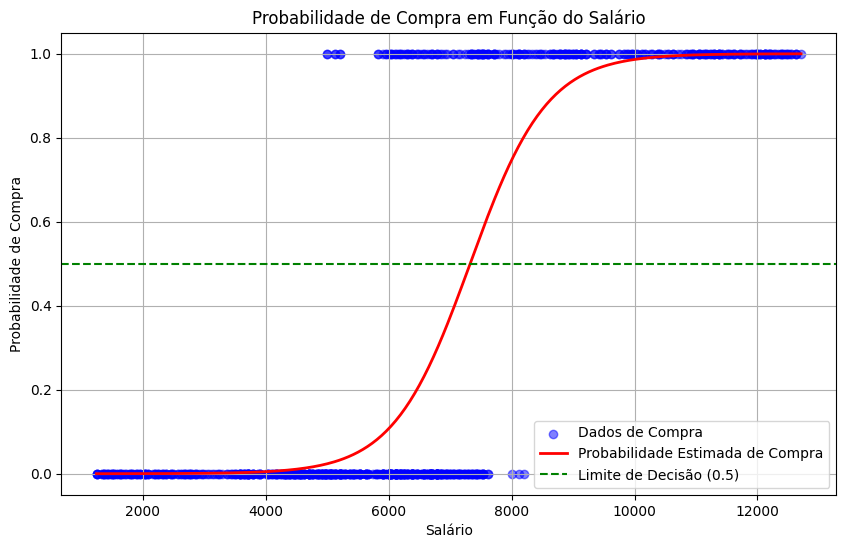

In [7]:
# Questao 5 (parte 2)
import numpy as np
import matplotlib.pyplot as plt

# Gerar valores de salário para prever a probabilidade de compra
salario_range = np.linspace(dados_conc['salario'].min(), dados_conc['salario'].max(), 300).reshape(-1, 1)
proba = modelo_logistico.predict_proba(salario_range)[:, 1]

# Plotando os dados de compra e a curva de probabilidade
plt.figure(figsize=(10, 6))
plt.scatter(dados_conc['salario'], dados_conc['compra'], color='blue', label='Dados de Compra', alpha=0.5)
plt.plot(salario_range, proba, color='red', label='Probabilidade Estimada de Compra', linewidth=2)
plt.title('Probabilidade de Compra em Função do Salário')
plt.xlabel('Salário')
plt.ylabel('Probabilidade de Compra')
plt.axhline(0.5, color='green', linestyle='--', label='Limite de Decisão (0.5)')
plt.legend()
plt.grid()
plt.show()